In [2]:
#Importo lo necesario
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%pylab inline
%matplotlib inline
from scipy.integrate import odeint
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


#Punto 1

In [3]:
#Creo las contrantes, el intervalo de tiempo y creo la función de ecuaciones diferenciales
a = 0.1
b = 0.1
c = 14.
t = np.linspace(0,600,100000)
def fun(Y,t):
    return np.array([(-Y[1]-Y[2]),Y[0]+(a*Y[1]),b+Y[2]*(Y[0]-c)])

In [4]:
#Se da la solución a las ecuaciones diferenciales
funsol,others=odeint(fun,[1.,1.,1.],t,full_output=True,printmessg=True)

Integration successful.


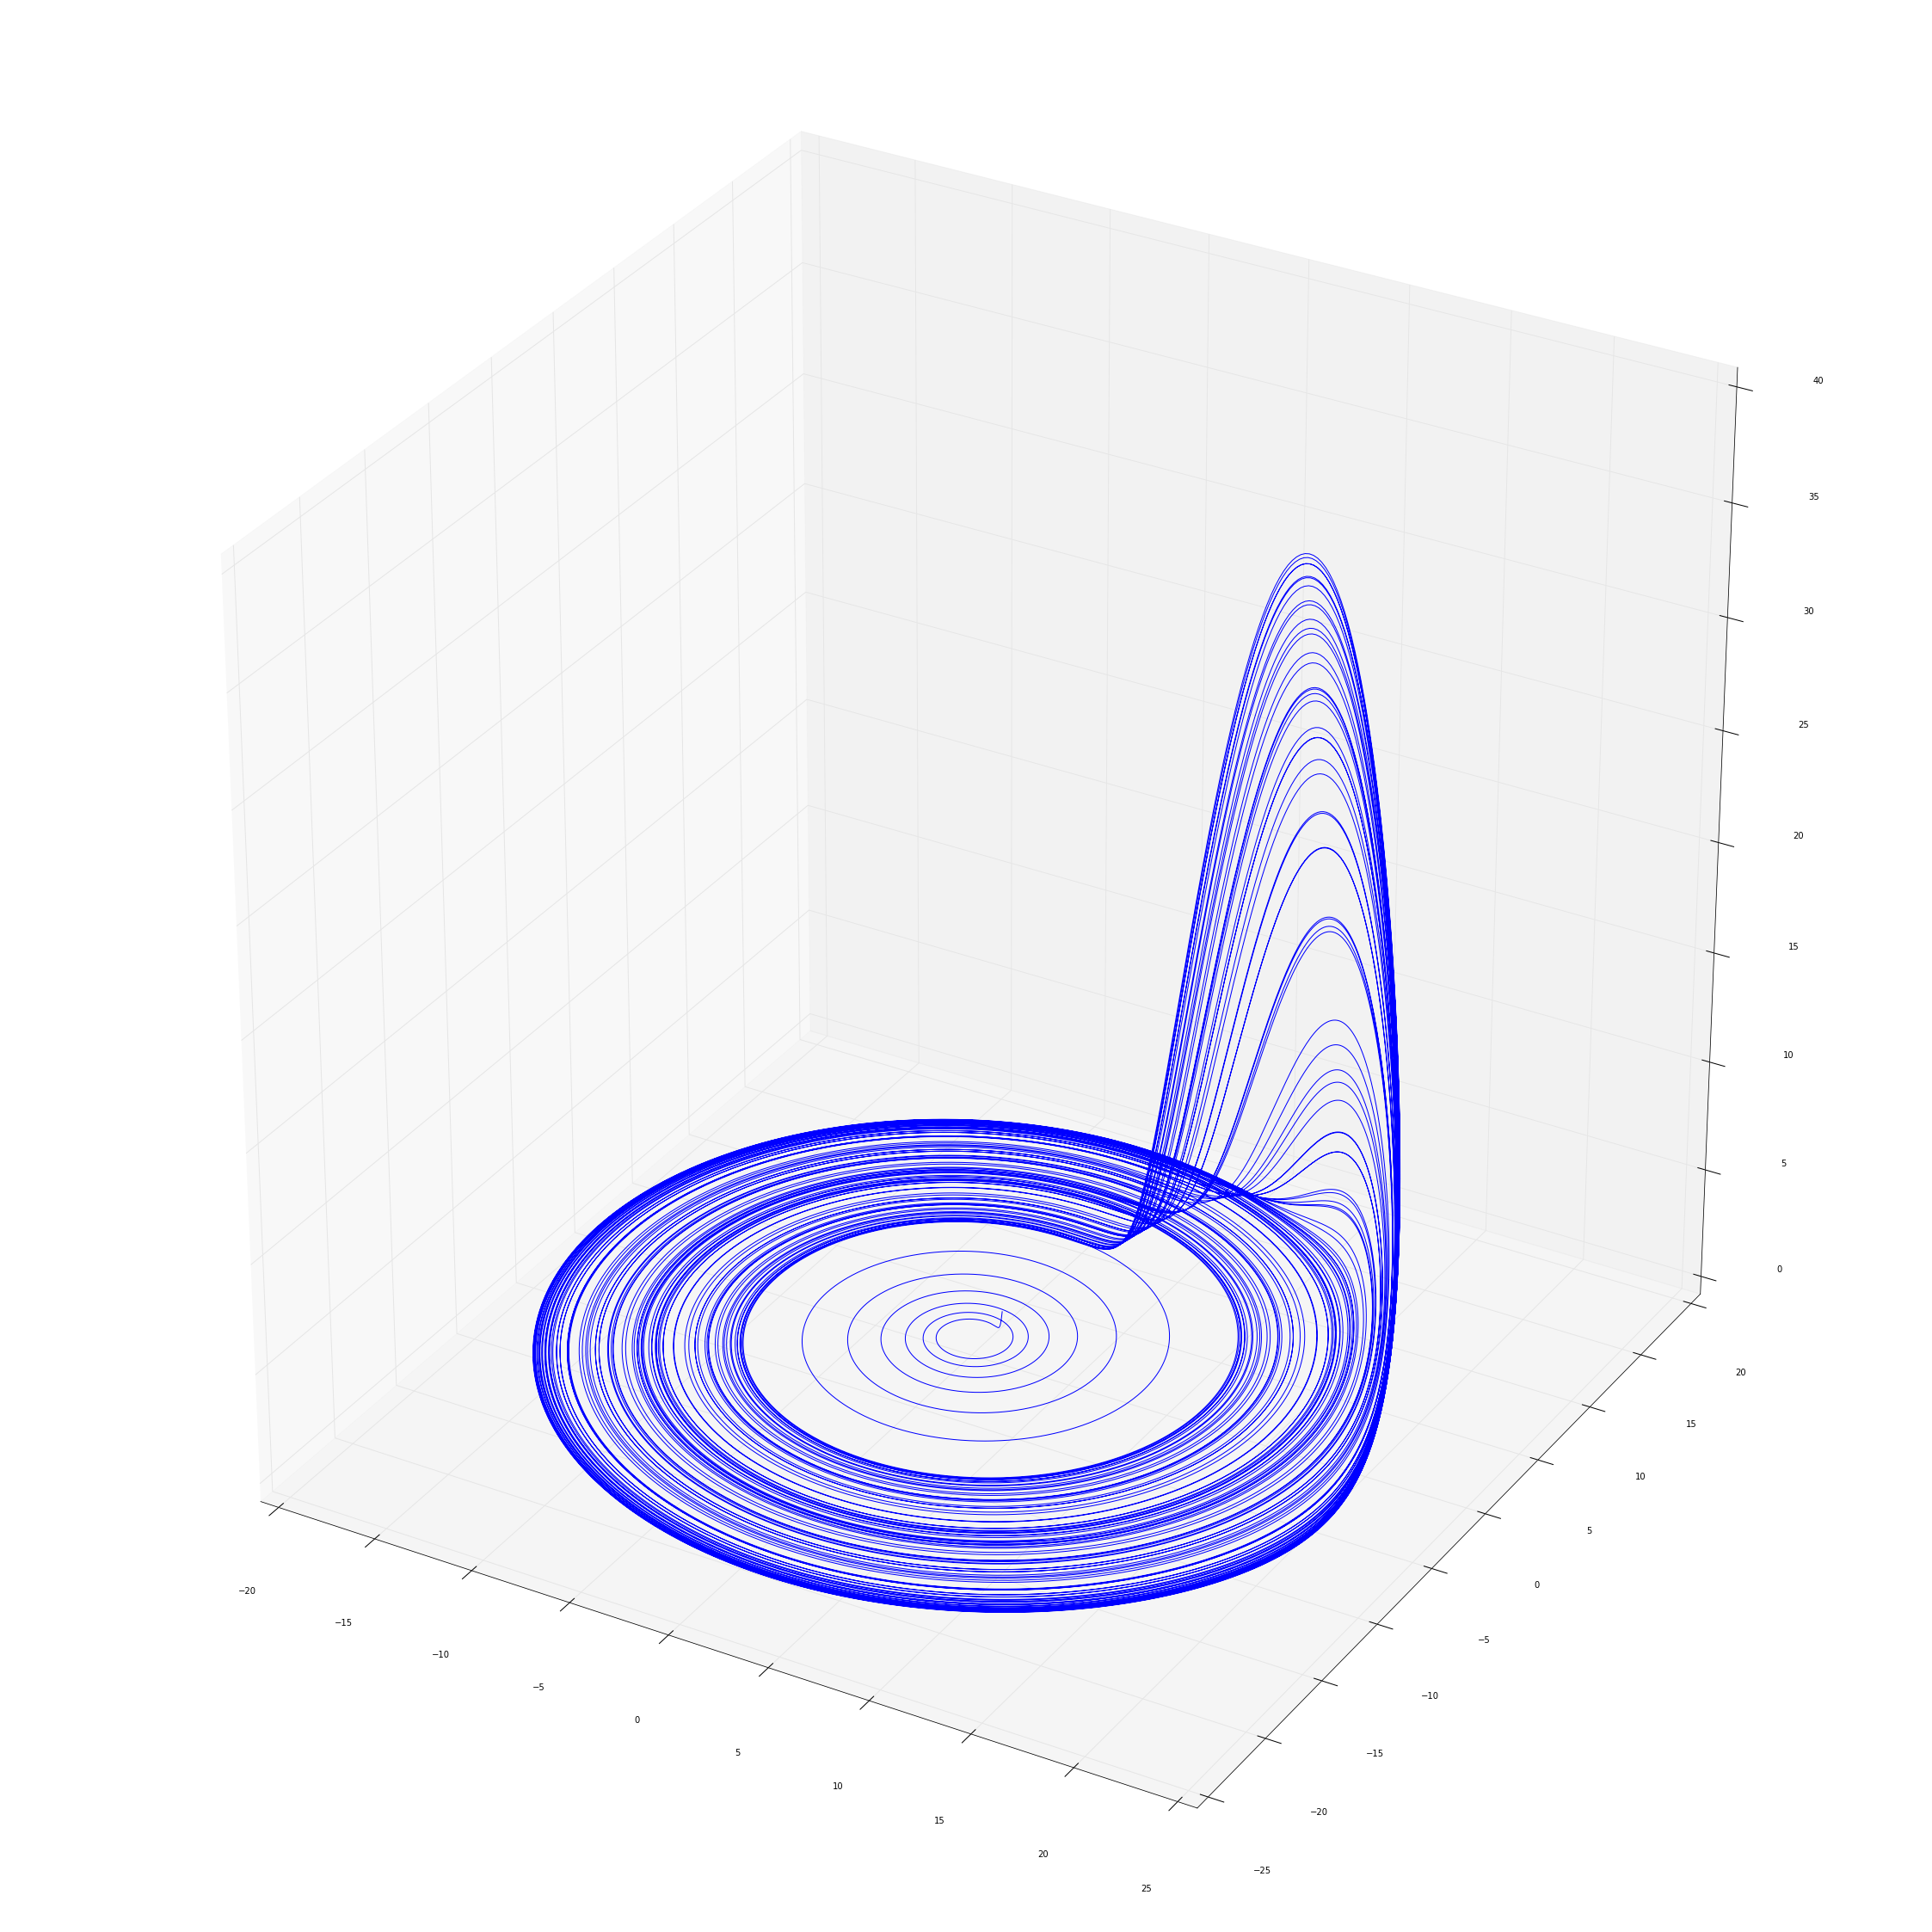

In [5]:
#Se hace la grafica
fig = plt.figure(figsize = (40,40))
ax = fig.add_subplot(111, projection='3d')
plt.plot(funsol[:,0],funsol[:,1],funsol[:,2])

In [6]:
#Se hace la grafica sobre el eje x,y
plt.figure(figsize=(30,30))
plt.plot(funsol[:,0],funsol[:,1])
plt.axis('equal')
plt.show()

#Punto 2

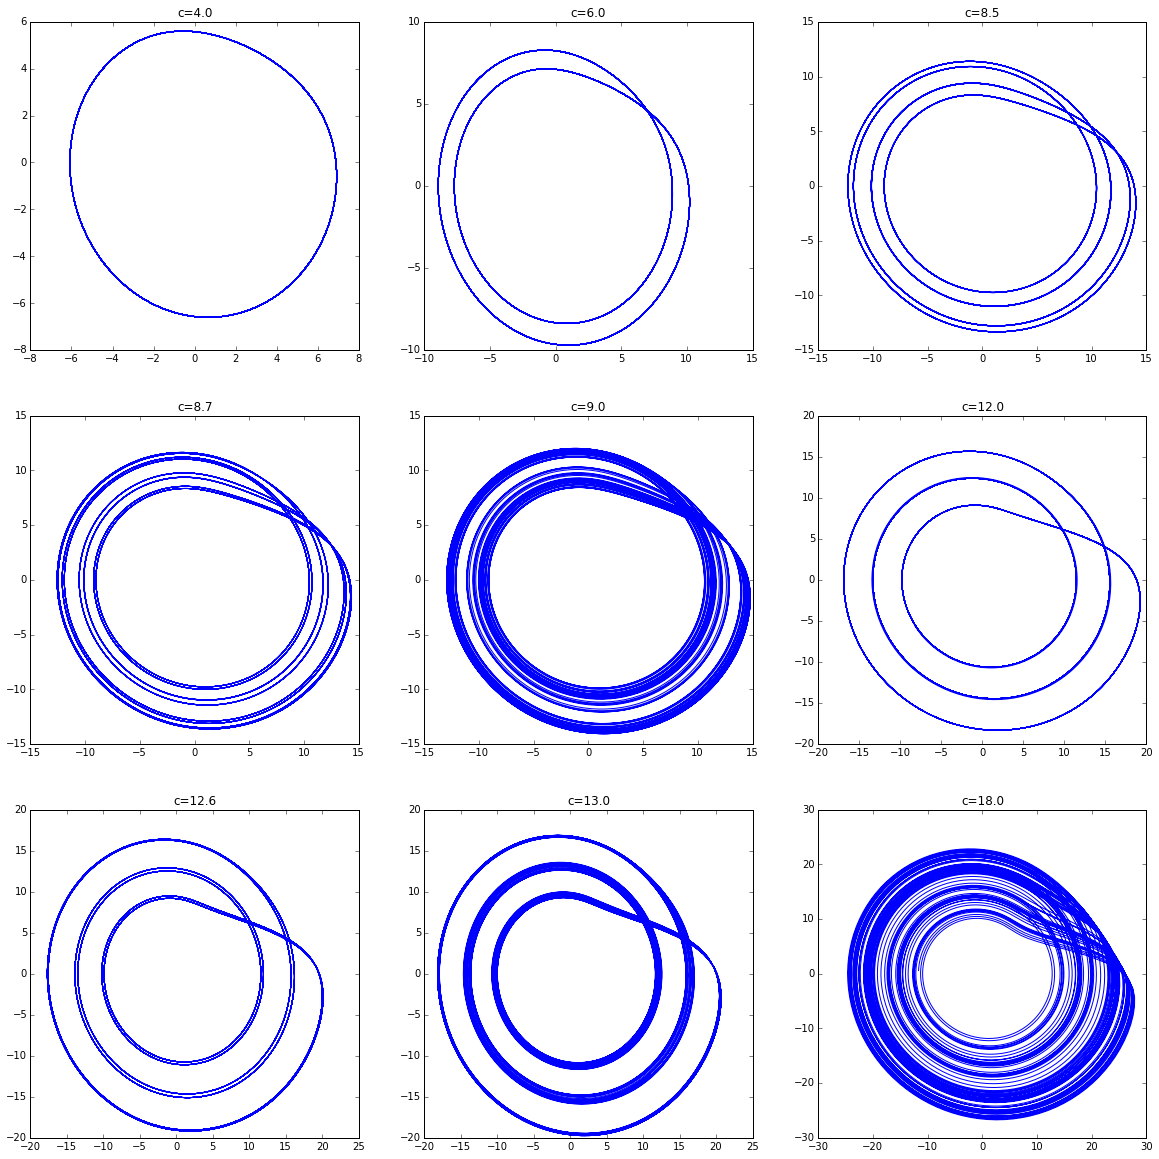

In [7]:
arrayc = [4.,6.,8.5,8.7,9.,12.,12.6,13.,18.]
a = 0.1
b = 0.1
t = np.linspace(0,600,10000)
plt.figure(figsize=(20,20))
for i in range(len(arrayc)):
    def fun(Y,t):
            return np.array([(-Y[1]-Y[2]),Y[0]+(a*Y[1]),b+Y[2]*(Y[0]-arrayc[i])])
    funsol,others=odeint(fun,[1.,1.,1.],t,full_output=True,printmessg=False)
    plt.subplot(3,3,i+1)
    plt.title("c={0}".format(arrayc[i]))
    plt.plot(funsol[:,0][-8000:],funsol[:,1][-8000:])

#Punto 3

In [8]:
#Se encuentran las soluciones para valores de c de 1  45
arrayd = np.linspace(1,45,100)
a = 0.1
b = 0.1
t = np.linspace(0,600,10000)
ejec = []
ejen = []
for i in range(len(arrayd)):
    def fun(Y,t):
            return np.array([(-Y[1]-Y[2]),Y[0]+(a*Y[1]),b+Y[2]*(Y[0]-arrayd[i])])
    funsol,others=odeint(fun,[1.,1.,1.],t,full_output=True,printmessg=False)
    xvector = funsol[:,0][-8000:]
    yvector = funsol[:,1][-8000:]
    for j in range(len(xvector)):
        if (-1<= xvector[j] <=1 and yvector[j] >=0):
            ejec.append(arrayd[i])
            ejen.append(yvector[j])

In [9]:
plt.figure(figsize=(15,10))
plt.xlim(0,45)
plt.ylim(0,60)
plt.xlabel("c")
plt.title("Rossler system: Bifurcation Diagram\n a=b=0.1")
plt.plot(ejec,ejen, "o", ms = 2.5)

#Punto 4

In [10]:
#Creo las contrantes, el intervalo de tiempo y creo la función de ecuaciones diferenciales
a = 0.1
b = 0.1
c = 14.
#duplico el tiempo
doblet = np.linspace(0,600,20000)
def fun(Y,t):
    return np.array([(-Y[1]-Y[2]),Y[0]+(a*Y[1]),b+Y[2]*(Y[0]-c)])

In [14]:
#Se da la solución a las ecuaciones diferenciales
funsol,others=odeint(fun,[1.,1.,1.],doblet,full_output=True,printmessg=False)

In [15]:
#Selecciono la información que necesito
ultix = funsol[:,0][-4000:]
ultiy = funsol[:,1][-4000:]
ultiz = funsol[:,2][-4000:]

In [17]:
#Usando los vectores unitarios se crean las proyecciones
theta = np.linspace(0, 2*pi, 10)
unitario1 = []
unitario2 = []
for i in range(len(theta)):
    unitario1.append([-sin(theta[i]), cos(theta[i]), 0])
    unitario2.append([-cos(pi/4)*cos(theta[i]), -cos(pi/4)*sin(theta[i]), sin(pi/4)])

In [18]:
unitario1

[[-0.0, 1.0, 0],
 [-0.64278760968653925, 0.76604444311897801, 0],
 [-0.98480775301220802, 0.17364817766693041, 0],
 [-0.86602540378443871, -0.49999999999999978, 0],
 [-0.34202014332566888, -0.93969262078590832, 0],
 [0.34202014332566866, -0.93969262078590843, 0],
 [0.86602540378443837, -0.50000000000000044, 0],
 [0.98480775301220813, 0.17364817766692997, 0],
 [0.64278760968653958, 0.76604444311897779, 0],
 [2.4492935982947064e-16, 1.0, 0]]

In [15]:
#Se crean las graficas a partir de los arrays que contienen los datos
ultimos = []
actualx0 = []
actualx1 = []
actualx2 = []
actualx3 = []
actualx4 = []
actualx5 = []
actualx6 = []
actualx7 = []
actualx8 = []
actualx9 = []
actualy0 = []
actualy1 = []
actualy2 = []
actualy3 = []
actualy4 = []
actualy5 = []
actualy6 = []
actualy7 = []
actualy8 = []
actualy9 = []
actualtotal = []
for i in range(len(ultix)):
    ultimos.append([ultix[i], ultiy[i], ultiz[i]])
    actualx0.append(np.dot(ultimos[i],unitario1[0]))
    actualy0.append(np.dot(ultimos[i],unitario2[0]))
    actualx1.append(np.dot(ultimos[i],unitario1[1]))
    actualy1.append(np.dot(ultimos[i],unitario2[1]))
    actualx2.append(np.dot(ultimos[i],unitario1[2]))
    actualy2.append(np.dot(ultimos[i],unitario2[2]))
    actualx3.append(np.dot(ultimos[i],unitario1[3]))
    actualy3.append(np.dot(ultimos[i],unitario2[3]))
    actualx4.append(np.dot(ultimos[i],unitario1[4]))
    actualy4.append(np.dot(ultimos[i],unitario2[4]))
    actualx5.append(np.dot(ultimos[i],unitario1[5]))
    actualy5.append(np.dot(ultimos[i],unitario2[5]))
    actualx6.append(np.dot(ultimos[i],unitario1[6]))
    actualy6.append(np.dot(ultimos[i],unitario2[6]))
    actualx7.append(np.dot(ultimos[i],unitario1[7]))
    actualy7.append(np.dot(ultimos[i],unitario2[7]))
    actualx8.append(np.dot(ultimos[i],unitario1[8]))
    actualy8.append(np.dot(ultimos[i],unitario2[8]))
    actualx9.append(np.dot(ultimos[i],unitario1[9]))
    actualy9.append(np.dot(ultimos[i],unitario2[9]))

Creo las imágenes y las guardo

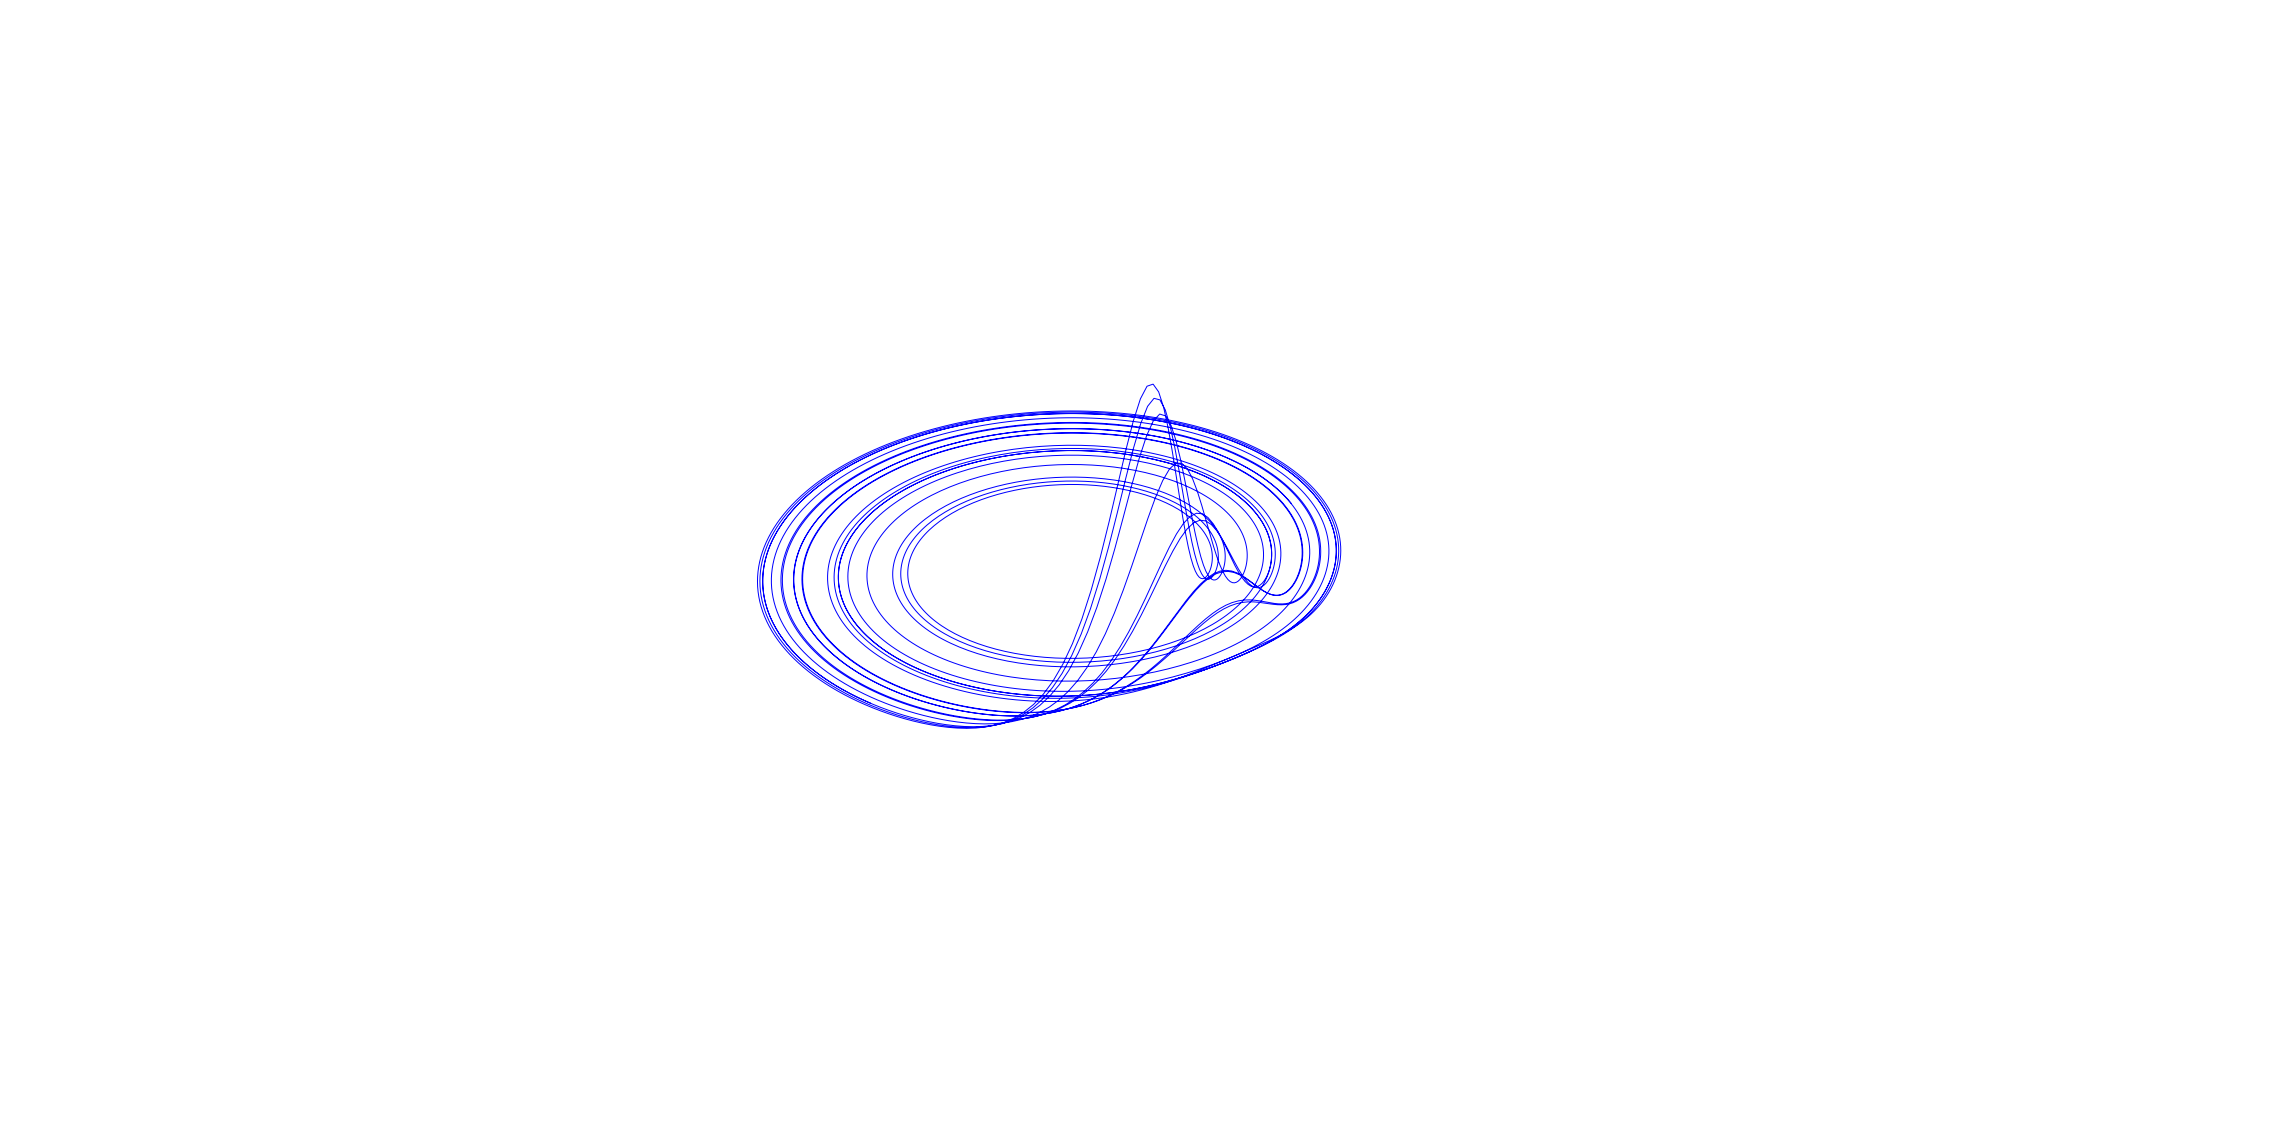

In [16]:
figure(figsize=(40,20))
plot(actualx0, actualy0)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo1.png')

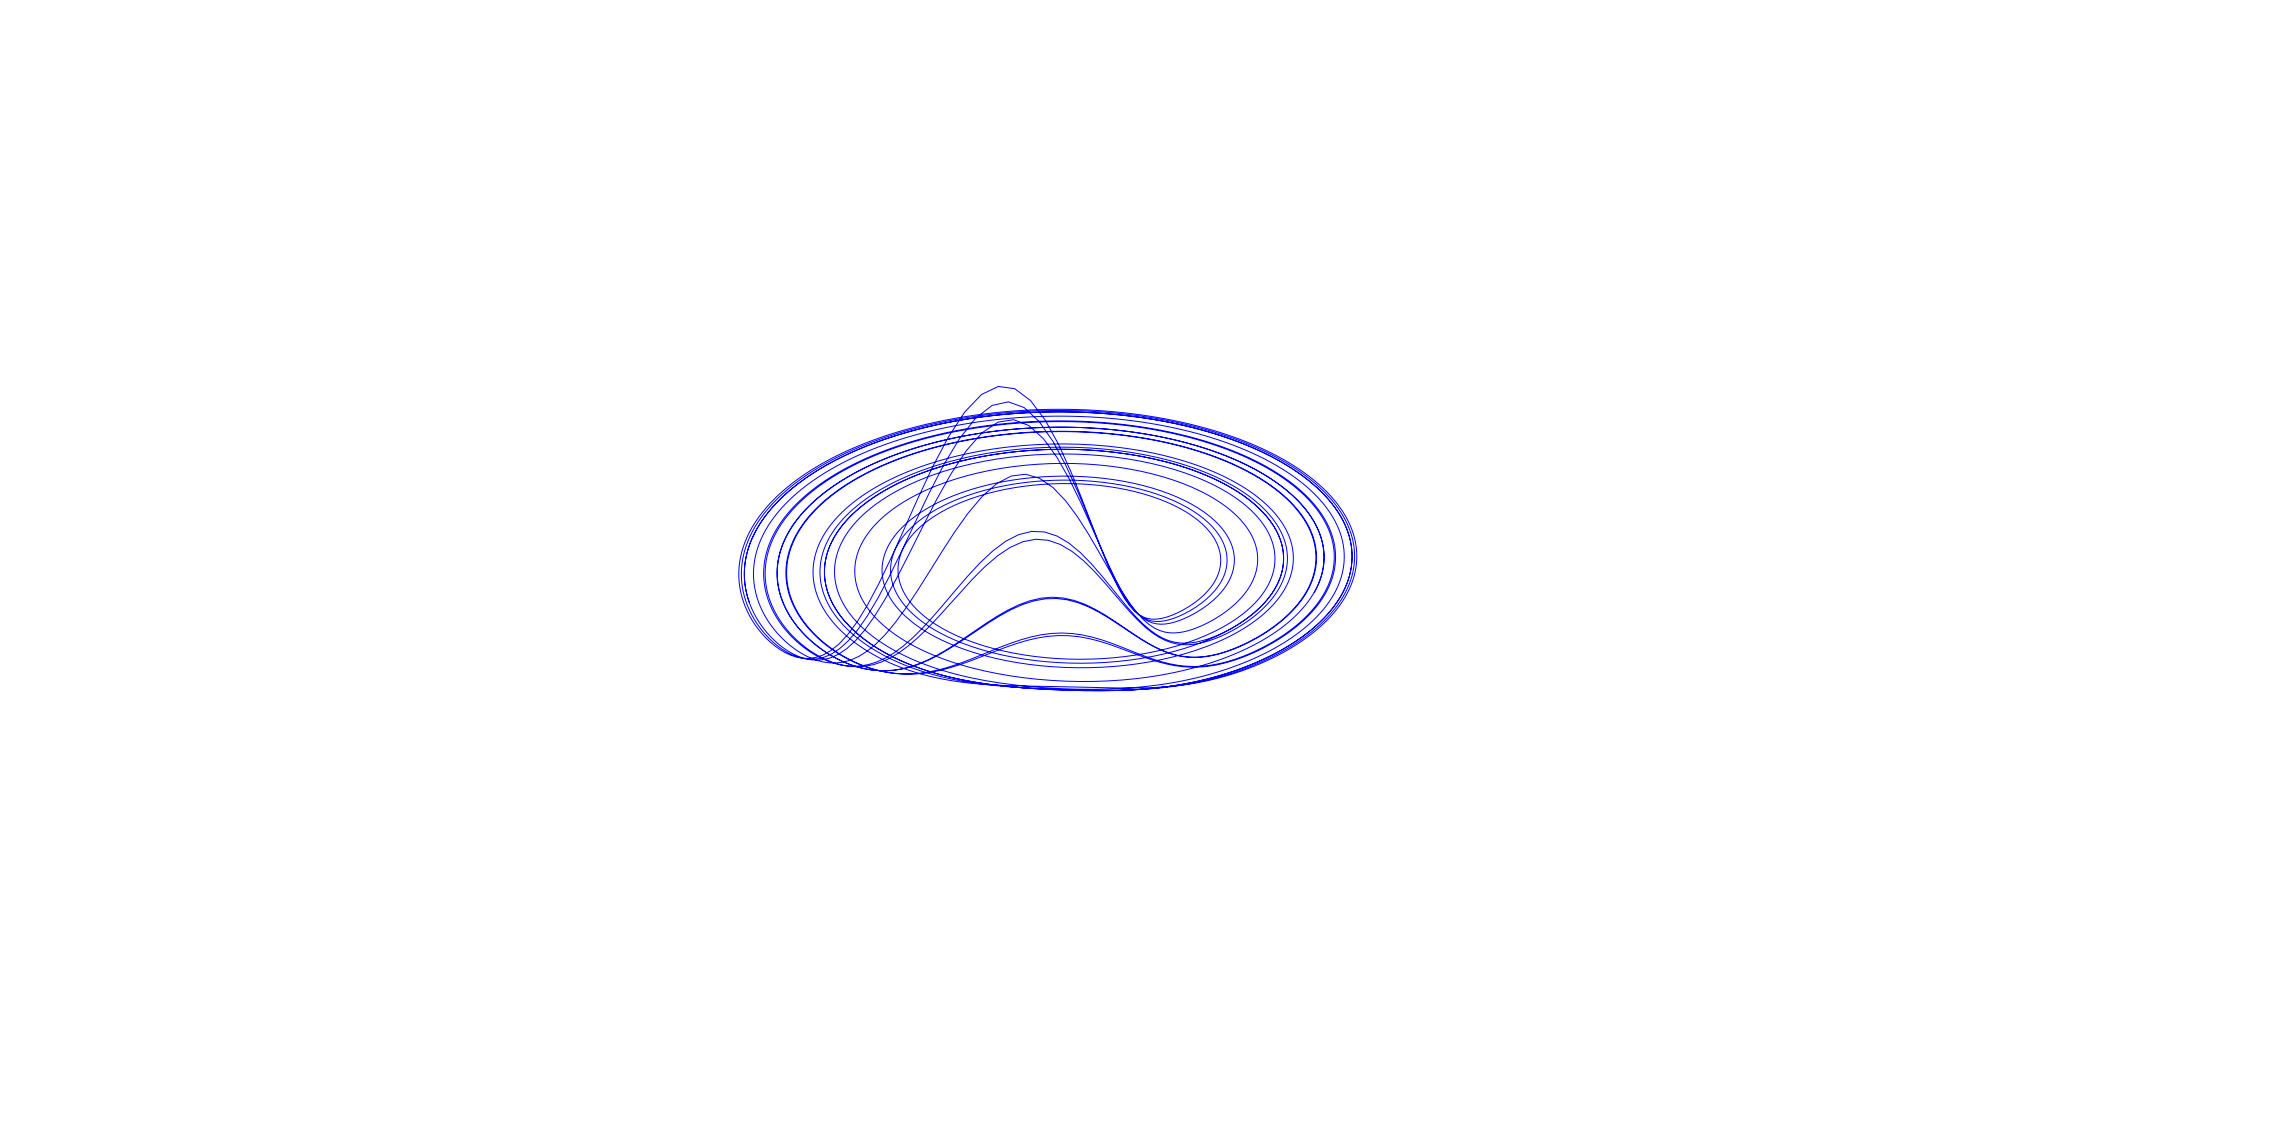

In [17]:
figure(figsize=(40,20))
plot(actualx1, actualy1)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo2.png')

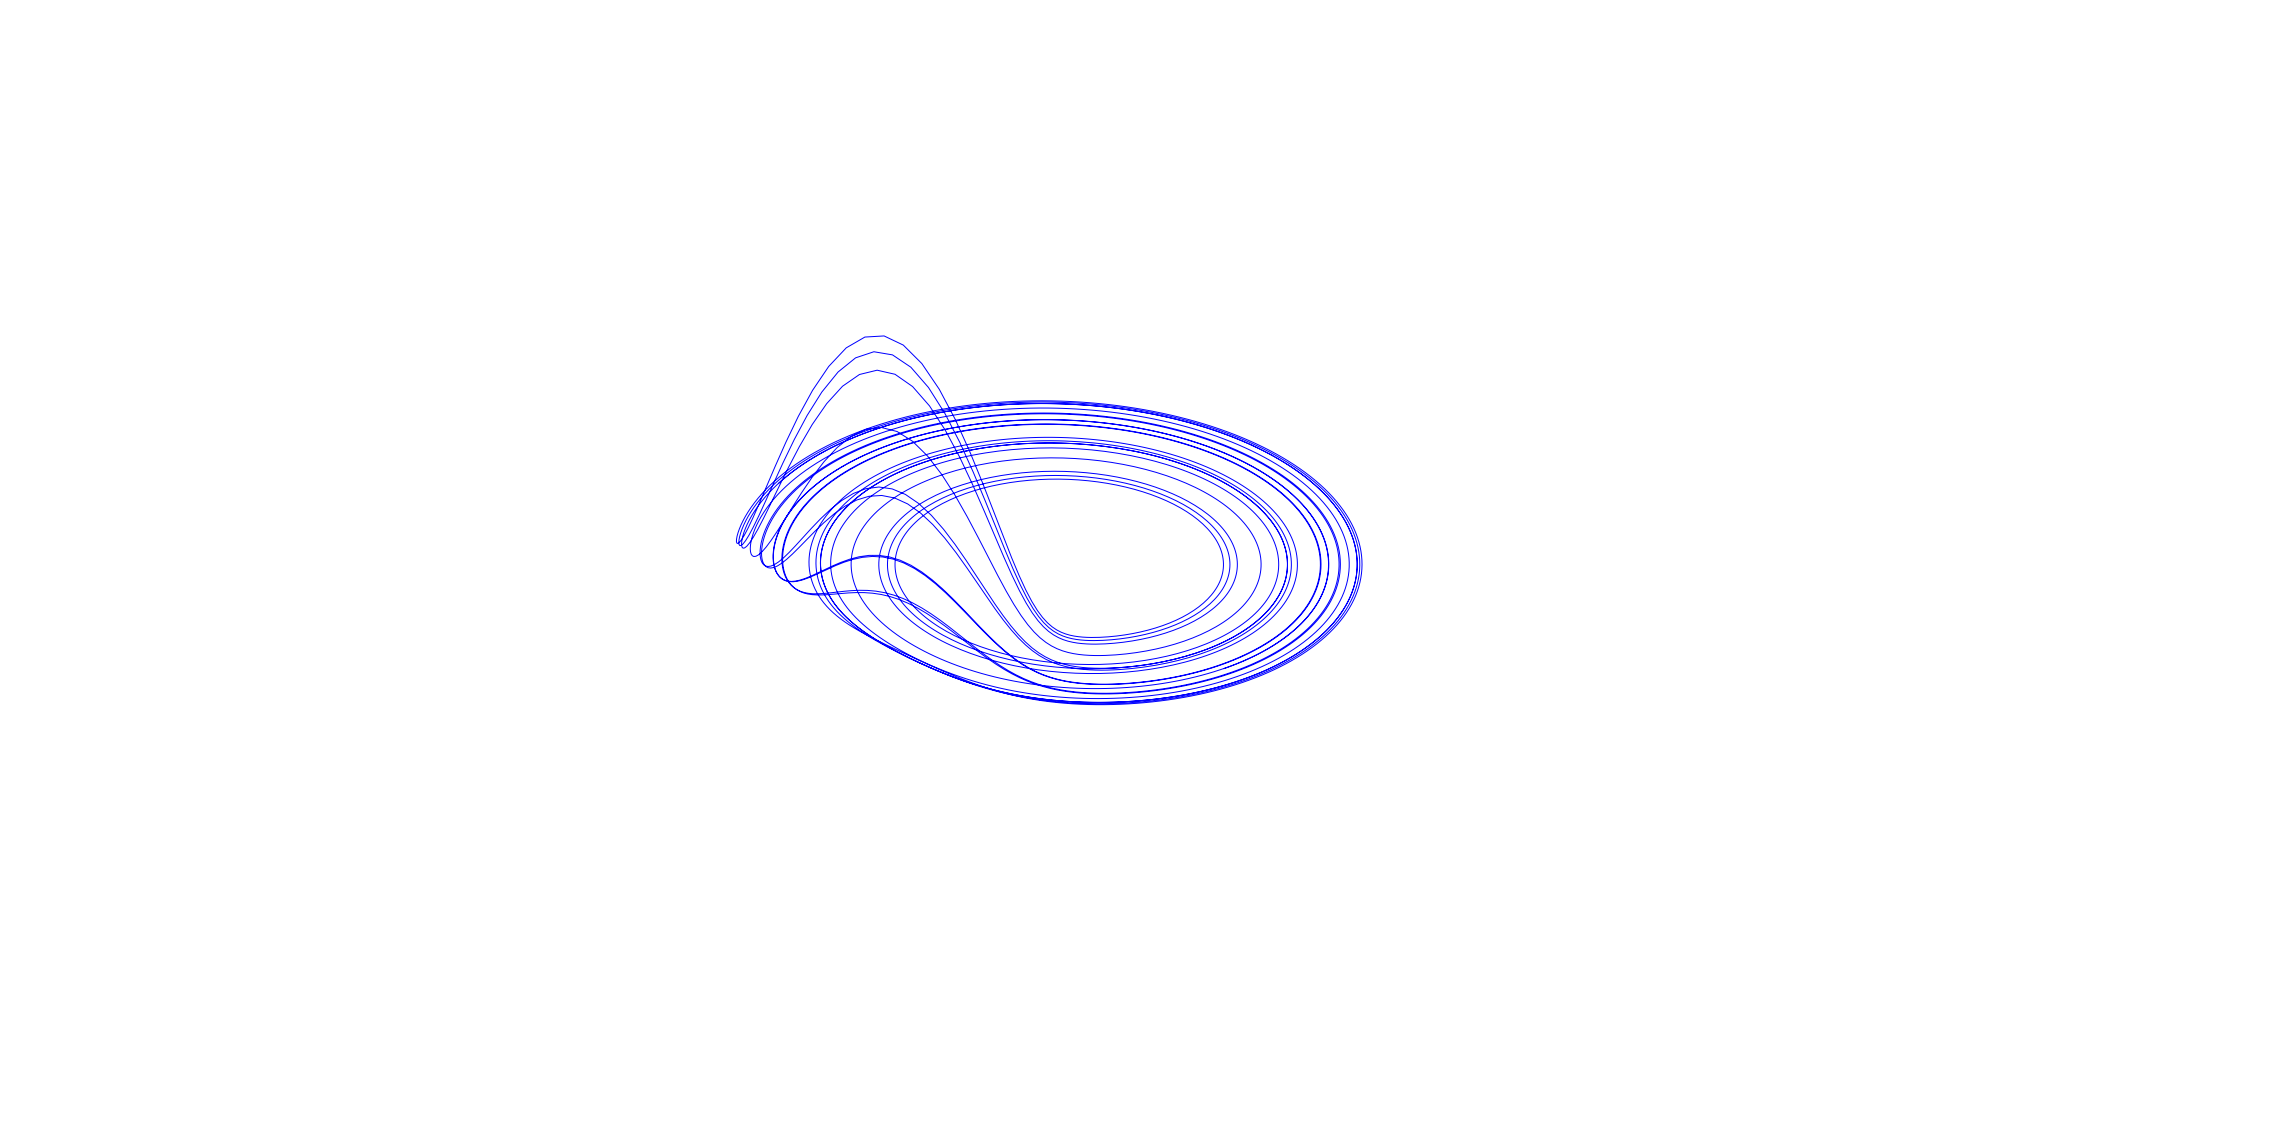

In [18]:
figure(figsize=(40,20))
plot(actualx2, actualy2)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo3.png')

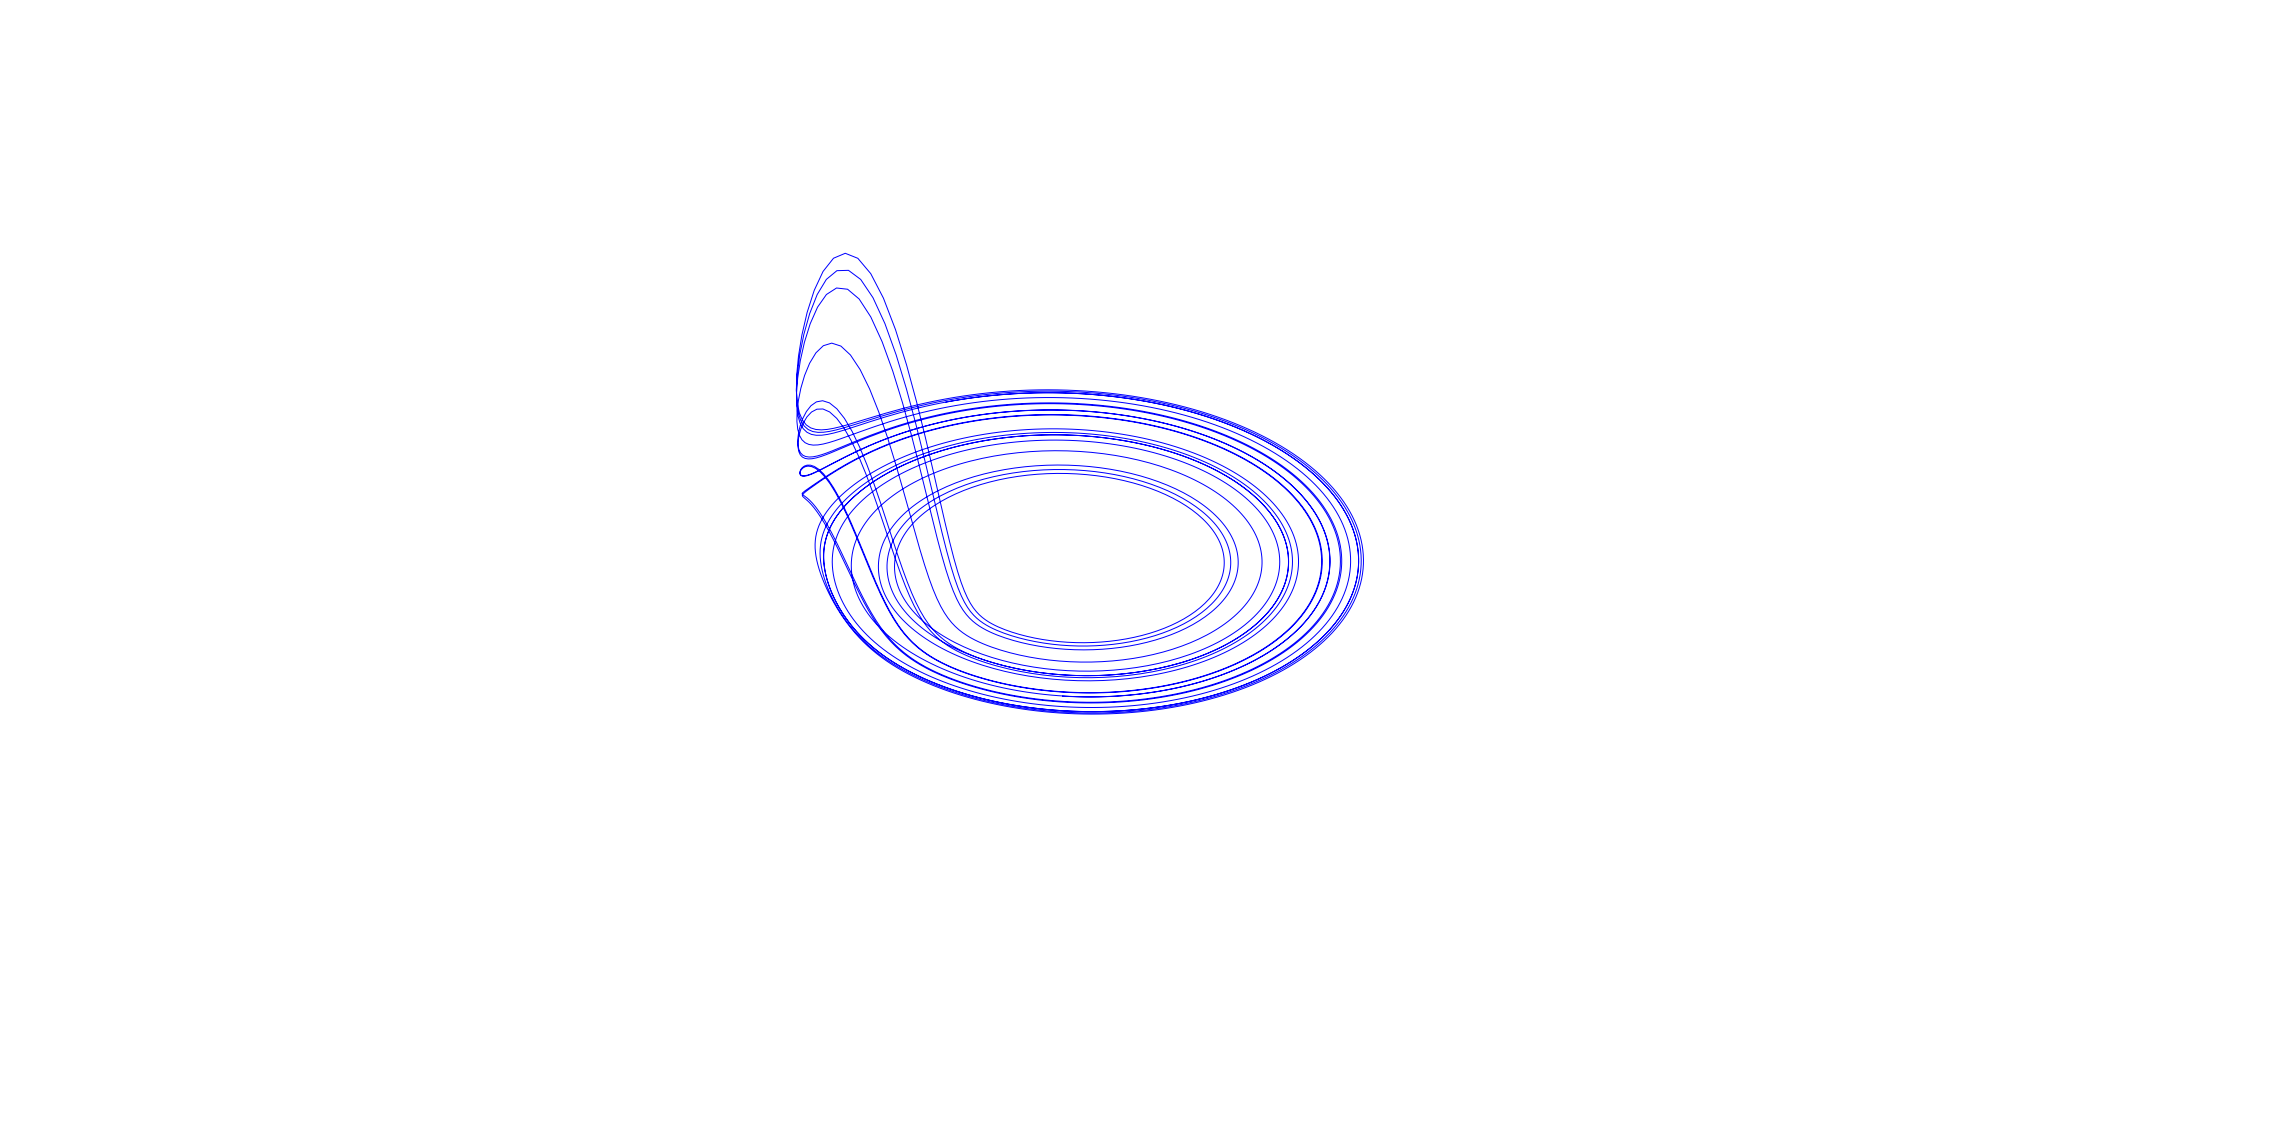

In [19]:
figure(figsize=(40,20))
plot(actualx3, actualy3)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo4.png')

In [20]:
figure(figsize=(40,20))
plot(actualx4, actualy4)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo5.png')

In [21]:
figure(figsize=(40,20))
plot(actualx5, actualy5)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo6.png')

In [22]:
figure(figsize=(40,20))
plot(actualx6, actualy6)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo7.png')

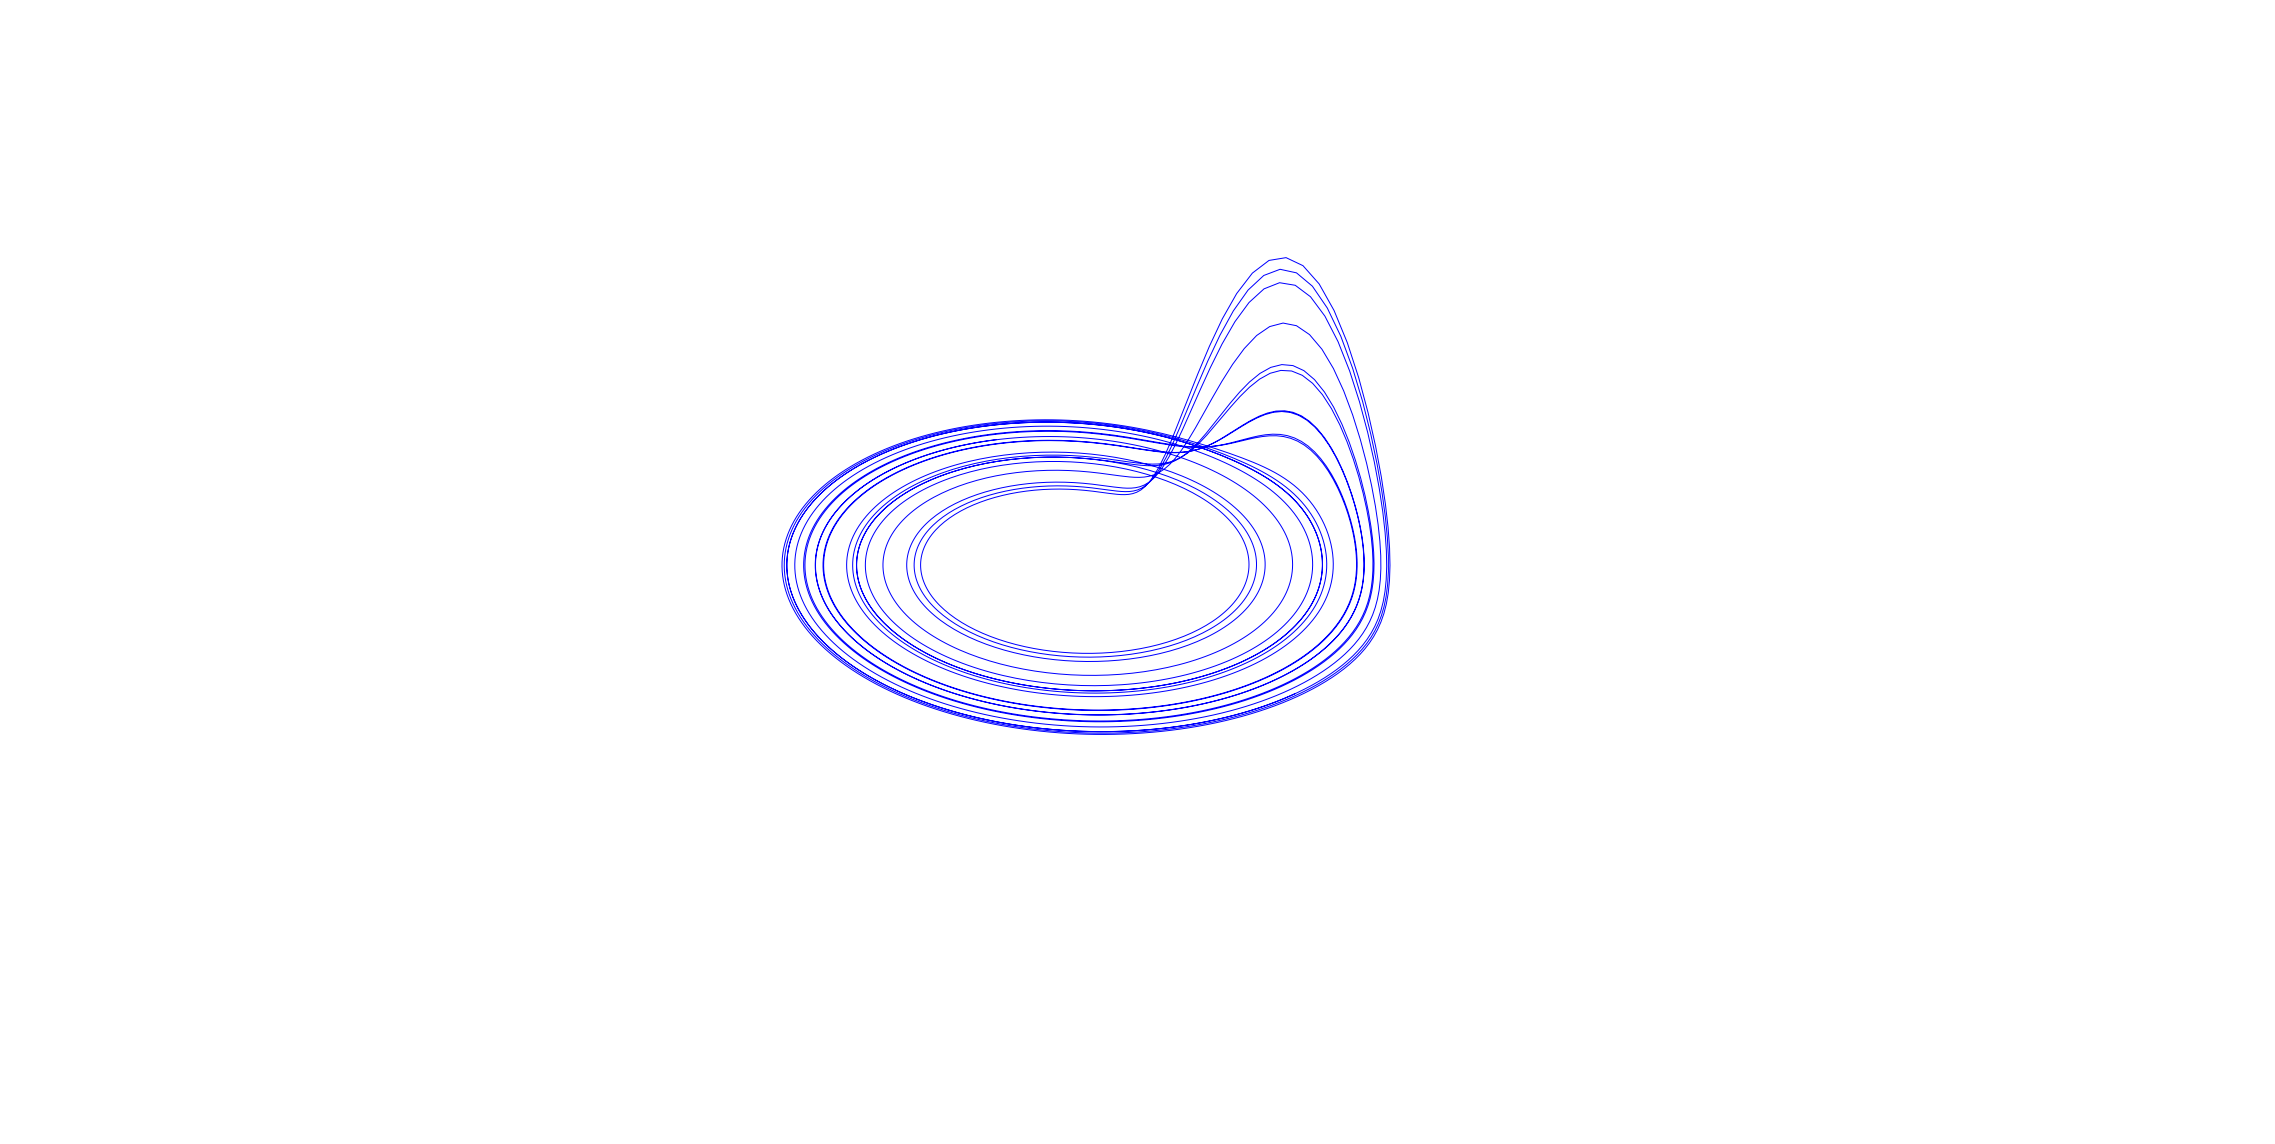

In [23]:
figure(figsize=(40,20))
plot(actualx7, actualy7)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo8.png')

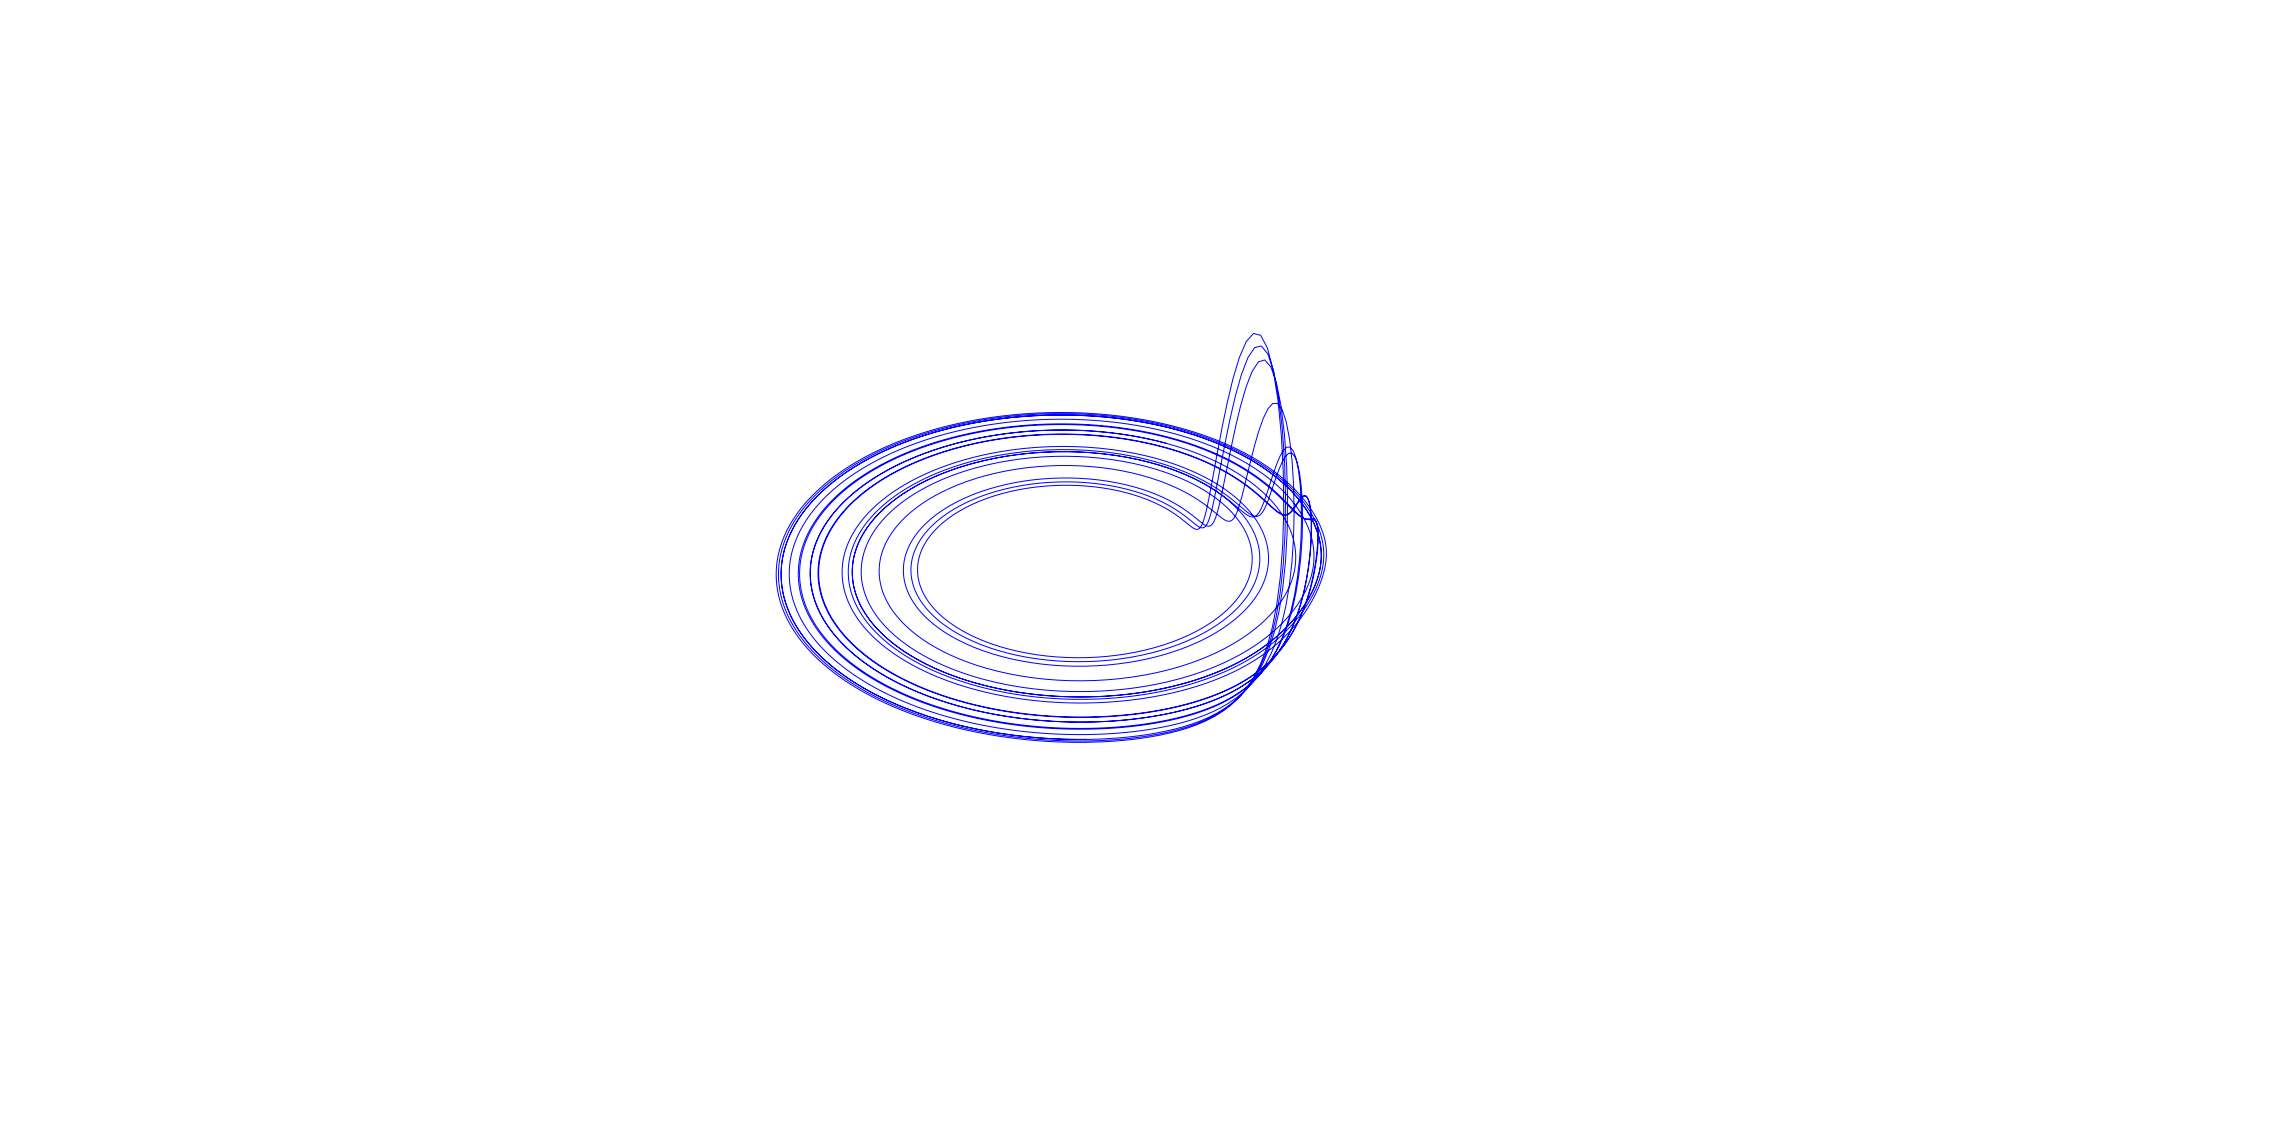

In [24]:
figure(figsize=(40,20))
plot(actualx8, actualy8)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo9.png')

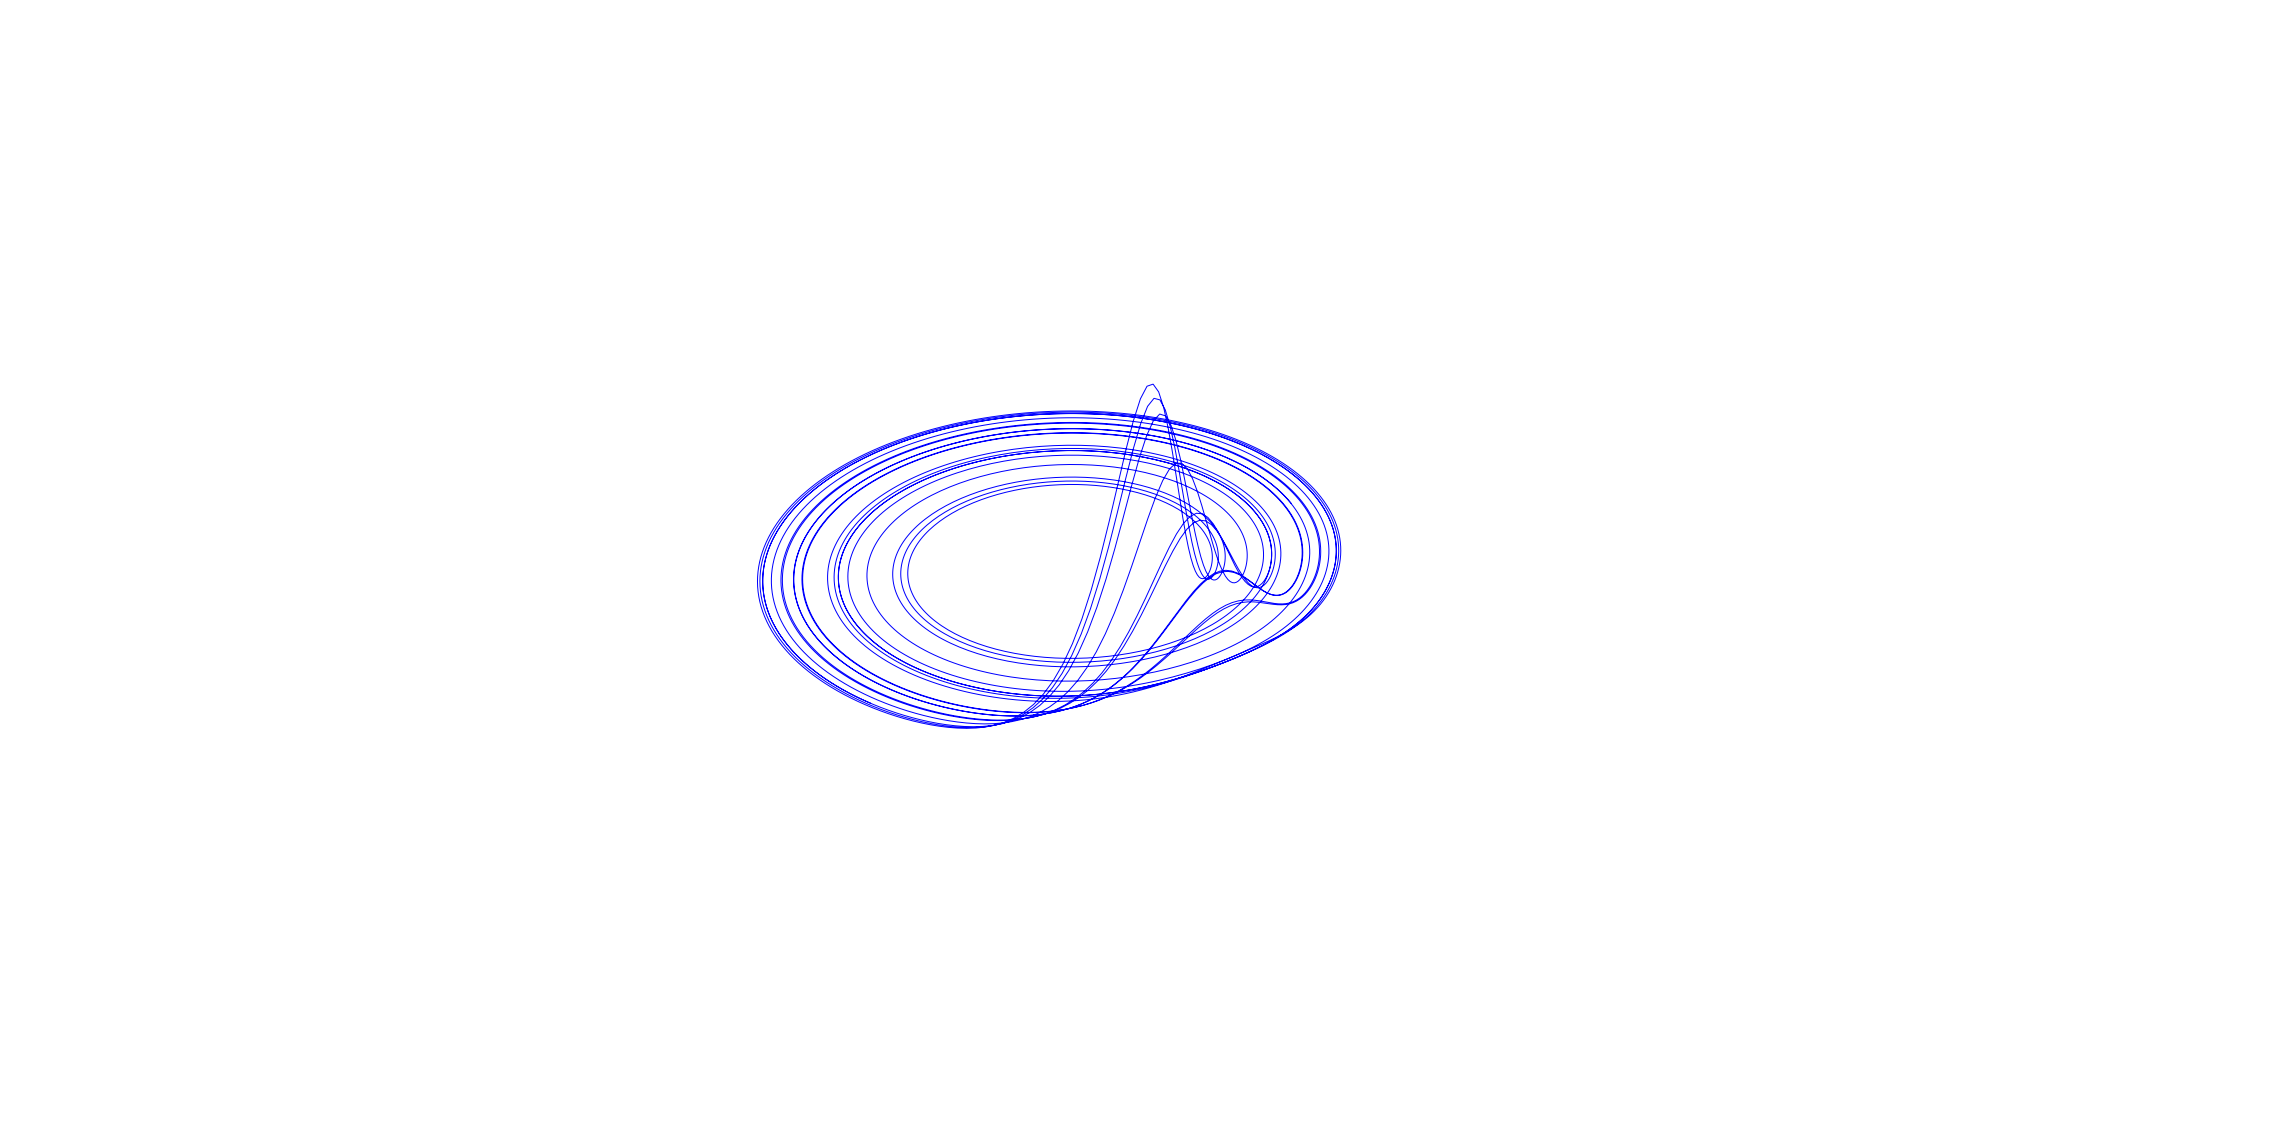

In [25]:
figure(figsize=(40,20))
plot(actualx9, actualy9)
xlim(-70,80)
ylim(-50,50)
axis('off')
savefig('foo10.png')

Luego utilizo un [código](https://github.com/diegolramirez/Notas/blob/master/convertHighlights.sh) aportado por un compañero del curso para crear gifs con imágenes guardadas en un PC, este codigo se compila en bash.

```
convert -delay 10 -loop 0 $(ls foo*.png | sort -V) nombreGif.gif
```


![](https://raw.githubusercontent.com/Axpero/MC/master/Im%C3%A1genes/nombreGif.gif)